# CLASE 13 - Visualización con Seaborn
#### Ejercicio práctico
----
## Actividad 1: Análisis de Ventas a lo Largo del Tiempo

### Consigna:

1. Crear un gráfico de líneas que muestra las ventas mensuales.
2. Redactar un párrafo breve que explique la gráfica.

### Dataset

```python
# Datos de ventas mensuales (en unidades)
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul',
'Ago', 'Sep', 'Oct', 'Nov', 'Dic'] # Lista de los meses del año

ventas = [100, 120, 130, 150, 180, 170, 200, 210, 250, 270,
300, 320] # Lista de las unidades vendidas correspondientes a cada mes
```

---

* Primero importamos las librerías que vamos a usar: **Pandas** para manejar los datos y **Matplotlib/Seaborn** para graficar.
* Luego creamos dos listas con los nombres de los meses y las ventas mensuales, y las combinamos en un **DataFrame**, que es una estructura de datos tabular.
* Finalmente mostramos el contenido para verificar que todo esté correcto.


In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Seaborn se apoya en Matplotlib

# Creamos los datos del ejercicio
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul',
         'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas = [100, 120, 130, 150, 180, 170, 200, 210, 250, 270, 300, 320]

# Creamos un DataFrame de Pandas para organizar los datos
df = pd.DataFrame({'Mes': meses, 'Ventas': ventas})

# Mostramos el DataFrame
df


,Mes,Ventas
0,Ene,100
1,Feb,120
2,Mar,130
3,Abr,150
4,May,180
5,Jun,170
6,Jul,200
7,Ago,210
8,Sep,250
9,Oct,270


### Cómo crear un gráfico de líneas en Seaborn

* `sns.lineplot()` reemplaza a `plt.plot()`.
* Los argumentos `x` y `y` se indican por nombre de columna.
* `marker="o"` agrega un punto en cada valor.
* Seaborn aplica automáticamente un estilo más limpio y moderno.

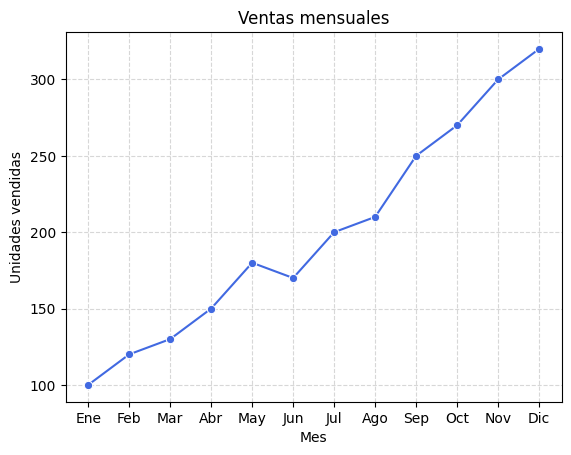

In [ ]:
# Gráfico básico de líneas con Seaborn
sns.lineplot(data=df,
             x="Mes",
             y="Ventas",
             marker="o",
             color="royalblue")

plt.title("Ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")

plt.grid(True,
         linestyle="--",
         alpha=0.5
         )
plt.show()

Este es el gráfico más simple que podemos hacer con Seaborn.

`sns.lineplot()` traza una línea que conecta los puntos (x, y). En este caso, los **meses** se ubican en el eje horizontal y las **ventas** en el vertical.

El resto de las líneas agrega el título, etiquetas y una cuadrícula para que sea más legible.

---

###  Mejora del gráfico de líneas

Ahora vamos a usar algunos parámetros para hacerlo más claro y atractivo:


* `sns.set_theme(style="whitegrid")` aplica un fondo con cuadrícula blanca, ideal para datos numéricos.
* `marker`, `linewidth` y `linestyle` funcionan igual que en Matplotlib.
* Se mantiene `plt.grid()` para reforzar la cuadrícula con un estilo tenue (`alpha=0.5`).
* `plt.tight_layout()` ajusta márgenes automáticamente para evitar recortes.

> Visualmente, este gráfico mantiene el control fino de Matplotlib, pero con el estilo moderno y coherente que Seaborn aplica por defecto.

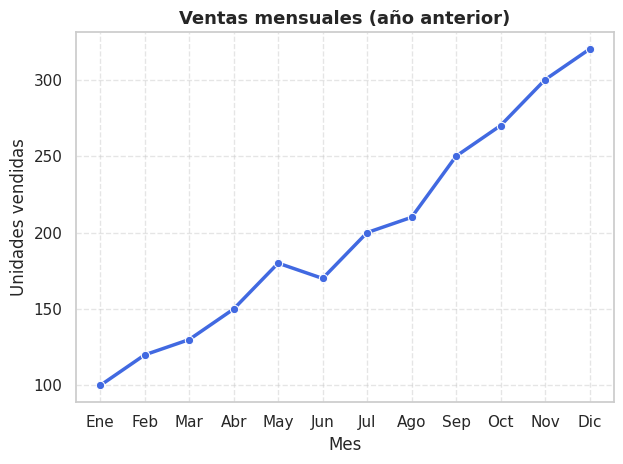

In [ ]:
# Estilo general de Seaborn
sns.set_theme(style="whitegrid")

# Gráfico de líneas con opciones de estilo
sns.lineplot(
    data=df,
    x="Mes", y="Ventas",
    color="royalblue",
    marker="o",
    linewidth=2.5,
    linestyle="-"
)

# Personalización de etiquetas y formato
plt.title("Ventas mensuales (año anterior)", fontsize=13, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.grid(True, linestyle="--", alpha=0.5)  # cuadrícula más suave
plt.tight_layout()
plt.show()


### Agregar etiquetas de valores a cada punto

Vamos a hacer una **versión más elaborada** que incluya:

1. **Etiquetas numéricas** sobre cada punto.
2. Un **relleno suave** bajo la curva (`fill_between`) ,una de las mejoras visuales que se integran fácilmente con Seaborn.
3. Uso de una **paleta de colores de Seaborn**, en lugar de un color fijo.
4. Un **tema visual** diferente para mostrar cómo Seaborn modifica el estilo general del gráfico.

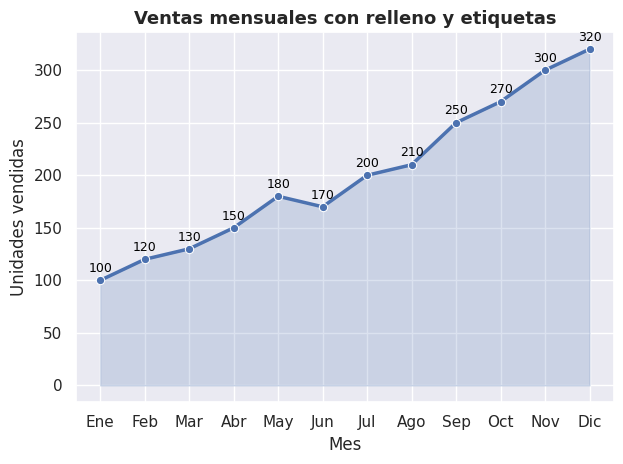

In [ ]:
# Tema visual diferente (tono pastel)
sns.set_theme(style="darkgrid", palette="deep")

# Gráfico de líneas principal
sns.lineplot(
    data=df,
    x="Mes", y="Ventas",
    linewidth=2.5,
    marker="o",
    color=sns.color_palette("deep")[0]
)

# Agregamos un área suavemente coloreada bajo la curva
plt.fill_between(df["Mes"], df["Ventas"], color=sns.color_palette("deep")[0], alpha=0.2)

# Agregamos etiquetas de valor sobre cada punto
for i, valor in enumerate(df["Ventas"]):
    plt.text(i, valor + 5, str(valor), ha="center", va="bottom", fontsize=9, color="black")

# Personalización final
plt.title("Ventas mensuales con relleno y etiquetas", fontsize=13, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.tight_layout()
plt.show()

### **Qué tiene de especial esta versión:**

* `sns.set_theme(style="darkgrid", palette="deep")` → cambia el estilo del fondo y aplica una **paleta de colores coherente**.
* `plt.fill_between()`: crea una **sombra suave** bajo la línea, mejorando la percepción de volumen o tendencia.
* `sns.color_palette("deep")[0]`: selecciona el primer color de la paleta actual de Seaborn (puede cambiarse por `"pastel"`, `"muted"`, `"bright"`, etc.).
* Las **etiquetas de valor** ayudan a leer el gráfico sin necesidad de pasar el cursor o estimar visualmente.

----

### Otras variaciones del gráfico de líneas


En el gráfico siguiente se superponen tres líneas con distintos estilos:

* `label=` permite identificar cada línea en la **leyenda** (activada con `plt.legend()`).
* Cambiamos el `marker` (círculo, cuadrado, triángulo).
* Usamos diferentes `linestyle`: `"--"` (guiones) y `":"` (puntos).
* `plt.figure(figsize=(10,5))` controla el tamaño del gráfico.


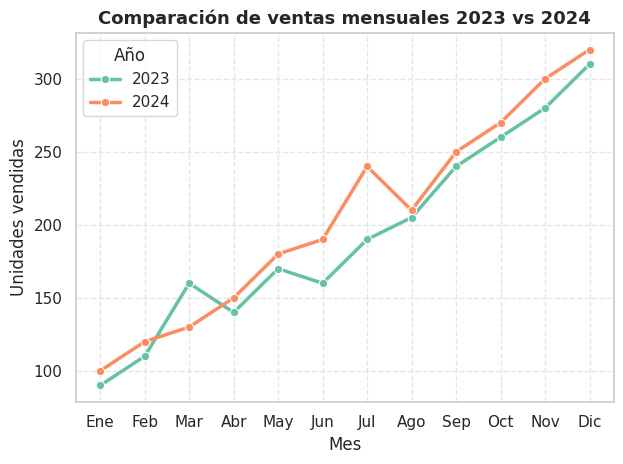

In [ ]:
# Creamos los datos de dos años
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul',
         'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas_2023 = [90, 110, 160, 140, 170, 160, 190, 205, 240, 260, 280, 310]
ventas_2024 = [100, 120, 130, 150, 180, 190, 240, 210, 250, 270, 300, 320]

# Creamos un DataFrame en formato "largo" (ideal para Seaborn)
df_multi = pd.DataFrame({
    "Mes": meses * 2,                     # meses + meses
    "Ventas": ventas_2023 + ventas_2024,  # ventas + ventas
    "Año": ["2023"] * 12 + ["2024"] * 12  # 2023x12 + 2024x12
})

# Configuramos el tema y paleta
sns.set_theme(style="whitegrid", palette="Set2")

# Creamos el gráfico
sns.lineplot(
    data=df_multi,
    x="Mes", y="Ventas", hue="Año", marker="o", linewidth=2.5
)

# Personalizamos el gráfico
plt.title("Comparación de ventas mensuales 2023 vs 2024", fontsize=13, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.legend(title="Año", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#display(df_multi.head())
